<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 106kB/s 
     |████████████████████████████████| 3.1MB 49.9MB/s 
     |████████████████████████████████| 501kB 43.3MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [4]:
tf.__version__

'2.0.0-beta1'

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
M, I, J, Ch = X_train.shape

In [0]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [0]:
X_train, X_test = X_train / np.max(X_train), X_test / np.max(X_test) # scaling

In [0]:
K = len (set(y_train))

### Dimension Check

In [19]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


# Model Building

*Using functional API : better for split and multi-input / output*

In [0]:
i = Input (shape=(I,J,Ch))

In [0]:
c = 32
x = Conv2D (c, kernel_size=(3,3), strides=2, activation='relu')(i)
x = Conv2D (c*2, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Conv2D (c*4, kernel_size=(3,3), strides=2, activation='relu')(x)
x = Flatten ()(x)
x = Dropout (0.5)(x)
x = Dense (1024, activation='relu')(x)
x = Dropout (0.5)(x)
x = Dense (K, activation='softmax')(x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.0001, decay=1e-6)

In [0]:
model.compile (optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
%%capture
r = model.fit (X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [42]:
print ('Training Set Evaluation : ' + str(model.evaluate (X_train, y_train)))
print ('Test Set Evaluation : ' + str(model.evaluate (X_test, y_test)))

50000/50000 [==============================] - 14s 278us/sample - loss: 1.0147 - accuracy: 0.6450
Training Set Evaluation : [1.0147209464645386, 0.645]
10000/10000 [==============================] - 3s 280us/sample - loss: 1.0776 - accuracy: 0.6209
Test Set Evaluation : [1.0775758323669433, 0.6209]


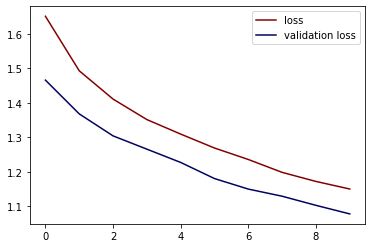

In [43]:
plt.plot (r.history['loss'], label='loss', color='#840000')
plt.plot (r.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

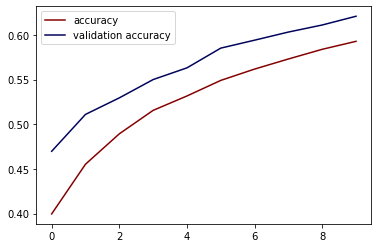

In [45]:
plt.plot (r.history['accuracy'], label='accuracy', color='#840000')
plt.plot (r.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()

In [0]:
X_test_100 = X_test[:100]
y_pred_100 = model.predict (X_test_100)

In [0]:
y_test_100 = y_test[:100]

In [0]:
y_pred_class_100 = []

In [0]:
for i in y_pred_100:
  y_pred_class_100.append (np.argmax(i))

In [76]:
y_pred_class_100 = np.array (y_pred_class_100)

array([3, 1, 8, 0, 4, 6, 1, 6, 3, 1, 0, 9, 6, 7, 9, 8, 5, 3, 8, 6, 7, 0,
       0, 9, 4, 6, 4, 7, 9, 6, 6, 5, 2, 3, 9, 3, 7, 1, 9, 3, 9, 6, 5, 6,
       0, 9, 3, 7, 7, 6, 9, 0, 6, 3, 8, 8, 7, 8, 5, 3, 7, 3, 7, 9, 6, 6,
       1, 0, 5, 7, 2, 6, 8, 8, 9, 2, 9, 3, 3, 8, 8, 1, 1, 5, 2, 7, 2, 8,
       8, 9, 0, 4, 8, 6, 4, 7, 6, 0, 0, 7])

### Misclassification Samples

In [0]:
misclass = np.where (y_pred_class_100 != y_test_100)[0]

In [82]:
misclass

array([ 1,  4, 12, 17, 22, 24, 25, 27, 32, 33, 35, 36, 39, 40, 47, 51, 52,
       57, 58, 59, 62, 63, 65, 67, 68, 74, 83, 85, 87, 91, 95])

In [0]:
i = np.random.choice (misclass)

In [88]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'airplane'

IndexError: ignored

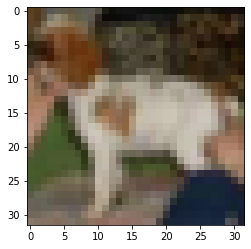

In [89]:
plt.imshow (X_test[i], cmap='Blues')
plt.title ('True: %s, Predicted: %s' % (str(labels[i]), str(labels[i])))